In [1]:
import numpy as np 

import xarray as xr

import matplotlib.pyplot as plt

import cartopy.crs as ccrs

/project/amp/akwilson/testdata/ENTER/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/project/amp/akwilson/testdata/ENTER/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
ds = xr.open_mfdataset("/project/amp/jcaron/CPC_Tminmax/tmax.*.nc")
#ds = xr.open_mfdataset("/project/amp/akwilson/1979-2005/tmax.*.nc")
de = xr.open_mfdataset("/project/amp/brianpm/TemperatureExtremes/Regridded/f.e13.FAMIPC5CN.ne30_ne30.beta17.t3.cam.h1.TREFMXAV.19650101-20051231.regrid.nc")
tmax1 = de['TREFMXAV'].compute()

In [333]:
#checker = (de['time.month'] == 12) & (de['time.day'] == 31)
#last_dec31 = np.asscalar(np.argwhere(checker.values == 1)[-1])
#print(last_dec31)
#trim_time = de.isel(time=slice(0,last_dec31+1))
#trim_time['time']

14964


<xarray.DataArray 'time' (time: 14965)>
array([cftime.DatetimeNoLeap(1965, 1, 1, 0, 0, 0, 0, 5, 1),
       cftime.DatetimeNoLeap(1965, 1, 2, 0, 0, 0, 0, 6, 2),
       cftime.DatetimeNoLeap(1965, 1, 3, 0, 0, 0, 0, 0, 3), ...,
       cftime.DatetimeNoLeap(2005, 12, 29, 0, 0, 0, 0, 1, 363),
       cftime.DatetimeNoLeap(2005, 12, 30, 0, 0, 0, 0, 2, 364),
       cftime.DatetimeNoLeap(2005, 12, 31, 0, 0, 0, 0, 3, 365)], dtype=object)
Coordinates:
  * time     (time) object 1965-01-01 00:00:00 ... 2005-12-31 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [3]:
tmax1_avg_by_month = tmax1.groupby('time.month').mean(dim='time')

In [131]:
month_names = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
lons, lats = np.meshgrid(de['lon'], de['lat'])  # this creates arrays of longitude and latitude

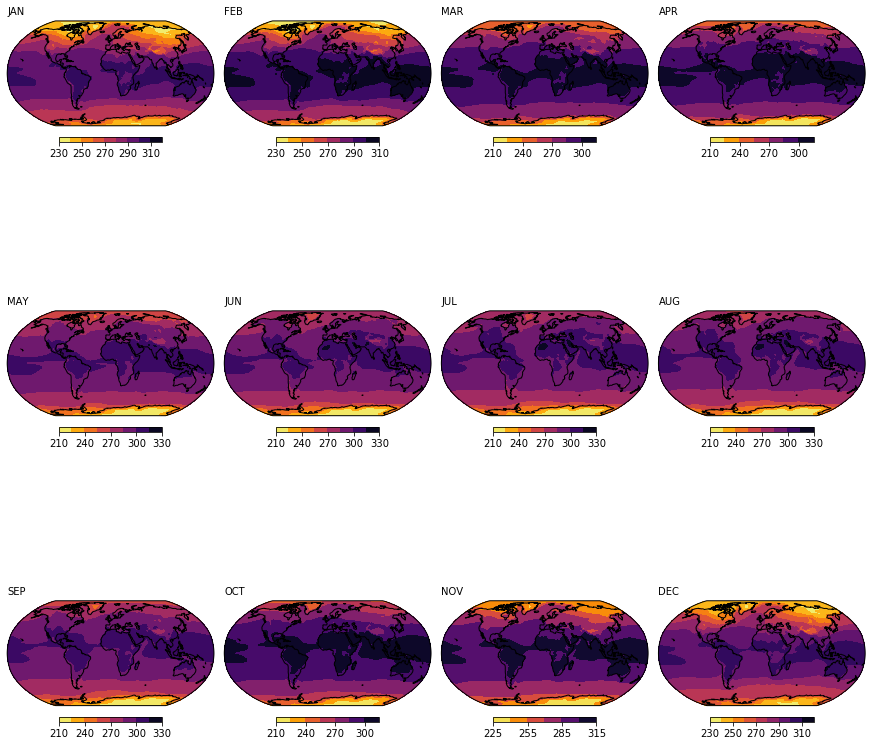

In [136]:
fig, ax = plt.subplots(figsize=(12,12), nrows=3, ncols=4, subplot_kw={"projection":ccrs.Robinson()}, constrained_layout=True)

for i, a in enumerate(ax.ravel()):
    im = a.contourf(lons, lats, tmax1_avg_by_month.isel(month=i), transform=ccrs.PlateCarree(), cmap='inferno_r')
    a.coastlines()
    cbar = fig.colorbar(im, ax=a, shrink=0.5, orientation='horizontal')
    # reduce ticks:
    clr_ticks = cbar.get_ticks()
    cbar.set_ticks(clr_ticks[::2])  
    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    a.set_global()
    a.set_title(month_names[i], loc='left', fontsize=10)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_solids', '_boundaries', '_central_N', '_config_axes', '_edges', '_extend_lower', '_extend_upper', '_extended_N', '_find_range', '_get_extension_lengths', '_get_ticker_locator_formatter', '_inside', '_label', '_labelkw', '_locate', '_manual_tick_data_values', '_mesh', '_outline', '_patch_ax', '_process_values', '_proportional_y', '_reset_locator_formatter_scale', '_set_label', '_slice_dict', '_ticker', '_uniform_y', '_use_auto_colorbar_locator', '_values', '_y', 'add_lines', 'alpha', 'ax', 'boundaries', 'cmap', 'config_axis', 'dividers', 'draw_all', 'drawedges', 'extend', 'extendfrac', 'extendrect', 'filled', 'formatter', 'get_clim', 'get_cma

Text(0.0, 1.0, 'JAN')

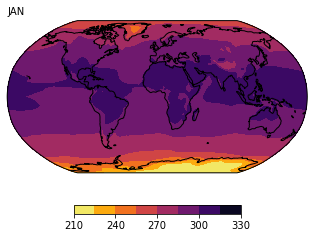

In [135]:
fig0, ax0 = plt.subplots(subplot_kw={"projection":ccrs.Robinson()})

im0 = ax0.contourf(lons, lats, tmax1_avg_by_month.isel(month=8), transform=ccrs.PlateCarree(), cmap='inferno_r')
ax0.coastlines()
cbar0 = fig0.colorbar(im0, ax=ax0, shrink=0.5, orientation='horizontal')
print(dir(cbar0))
# reduce ticks:
clr_ticks = cbar0.get_ticks()
print(clr_ticks)
cbar0.set_ticks(clr_ticks[::2])  
# # make the map global rather than have it zoom in to
# # the extents of any plotted data
ax0.set_global()
ax0.set_title(month_names[0], loc='left', fontsize=10)

In [4]:
cmich = (43. + 35/60,  360. - (84. + 46/60))
atlanta = (33. + 45/60,  360. - (84. + 23/60))

In [5]:
atlanta_tmax = tmax.sel(lat=atlanta[0], lon=atlanta[1], method='nearest').isel(time=slice(0,-1))

NameError: name 'tmax' is not defined

In [335]:
atlanta_tmax.std()

<xarray.DataArray 'TREFMXAV' ()>
array(7.174158, dtype=float32)
Coordinates:
    lat      float64 33.75
    lon      float64 275.8

In [351]:
atlanta_tmax['time']#[-1]

<xarray.DataArray 'time' (time: 14735)>
array(['1979-01-01T00:00:00.000000000', '1979-01-02T00:00:00.000000000',
       '1979-01-03T00:00:00.000000000', ..., '2019-05-03T00:00:00.000000000',
       '2019-05-04T00:00:00.000000000', '2019-05-05T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    lat      float32 33.75
    lon      float32 275.75
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-05-05
Attributes:
    long_name:           Time
    axis:                T
    standard_name:       time
    coordinate_defines:  start
    delta_t:             0000-00-01 00:00:00
    avg_period:          0000-00-01 00:00:00

In [ ]:
time = ds['time']
atlantaug = atlanta_tmax[(time.dt.month == 8)]


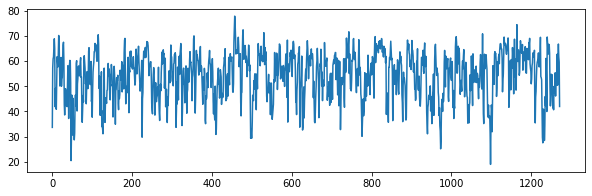

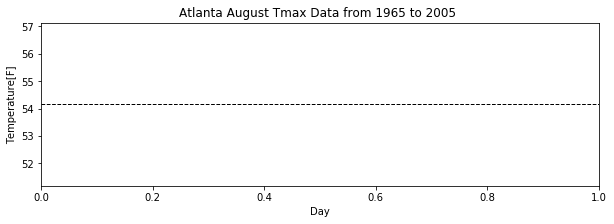

In [337]:
# print (de['time'])
fig100, ax103 = plt.subplots(figsize=(10,3))
xax = np.arange(len(augatlanta_f['time']))
ax103.plot(xax, augatlanta_f)


fig104, ax104 = plt.subplots(figsize=(10,3))
gb = list(augatlanta_f.groupby('time.year'))
# print(gb)
xax = np.arange(len(gb[0][1]['time']))
 #[ax104.plot(xax, gb[i][1], ('0.4')) for i,_ in enumerate(gb)]
plt.xlabel('Day')
plt.ylabel('Temperature[F]')
plt.title('Atlanta August Tmax Data from 1965 to 2005 ')
plt.axhline(augatlanta_f.mean(), color='k', linestyle='dashed', linewidth=1)

In [305]:
blah = [gb[i][1] for i,_ in enumerate(gb)]
[i.shape for i in blah]

[(31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (31,),
 (1,)]

In [205]:
gb[0][1]['time']
# gb --> list of (year, data) pairs (tuples)
# gb[0] is the first (year, data)
# gb[0][1] is the 2nd entry => data in that pair That's a DataArray


<xarray.DataArray 'time' (time: 31)>
array([cftime.DatetimeNoLeap(1965, 8, 1, 0, 0, 0, 0, 0, 213),
       cftime.DatetimeNoLeap(1965, 8, 2, 0, 0, 0, 0, 1, 214),
       cftime.DatetimeNoLeap(1965, 8, 3, 0, 0, 0, 0, 2, 215),
       cftime.DatetimeNoLeap(1965, 8, 4, 0, 0, 0, 0, 3, 216),
       cftime.DatetimeNoLeap(1965, 8, 5, 0, 0, 0, 0, 4, 217),
       cftime.DatetimeNoLeap(1965, 8, 6, 0, 0, 0, 0, 5, 218),
       cftime.DatetimeNoLeap(1965, 8, 7, 0, 0, 0, 0, 6, 219),
       cftime.DatetimeNoLeap(1965, 8, 8, 0, 0, 0, 0, 0, 220),
       cftime.DatetimeNoLeap(1965, 8, 9, 0, 0, 0, 0, 1, 221),
       cftime.DatetimeNoLeap(1965, 8, 10, 0, 0, 0, 0, 2, 222),
       cftime.DatetimeNoLeap(1965, 8, 11, 0, 0, 0, 0, 3, 223),
       cftime.DatetimeNoLeap(1965, 8, 12, 0, 0, 0, 0, 4, 224),
       cftime.DatetimeNoLeap(1965, 8, 13, 0, 0, 0, 0, 5, 225),
       cftime.DatetimeNoLeap(1965, 8, 14, 0, 0, 0, 0, 6, 226),
       cftime.DatetimeNoLeap(1965, 8, 15, 0, 0, 0, 0, 0, 227),
       cftime.DatetimeNoLea

In [289]:

atlantaF= atlantaug1 -273.15
def degC_to_degF(C):
    return atlantaF * (9./5.) + 32.

In [290]:
augatlanta_f = degC_to_degF(atlantaF)

ImportError: Plotting of arrays of cftime.datetime objects or arrays indexed by cftime.datetime objects requires the optional `nc-time-axis` (v1.2.0 or later) package.

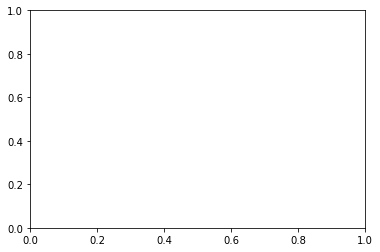

In [192]:
cmichjan_f.plot()

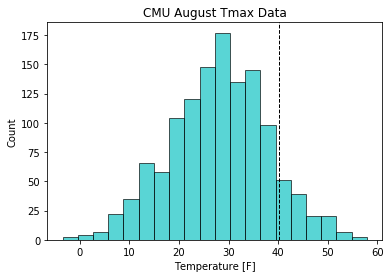

In [175]:

result = plt.hist(cmichjan_f, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(x=40.16, color='k', linestyle='dashed', linewidth=1)
plt.title('CMU January Tmax Data')
plt.xlabel('Temperature [F]')
plt.ylabel('Count')
plt.show()

#plt.text(1, 2, x=65.46)
#fig.savefig("/project/amp/akwilson/testdata/atlantajan_figure_001.png")


In [286]:
np.nanquantile(augatlanta_f,.50)


83.87590026855469

In [281]:
np.nanquantile(augcmich_f,.50)

25.611120223999023